# Matrix completion Methods for Causal Panel Data Models

If you want to measure the causal effect of a treatment, a counterfactual (untreated), you must **reconstruct** the untreated state of the world. Where $Y_{NT}$ is the matrix of potential results, and $W_{NT}$ where the index $W_{it} = 1$ indicates that the observation was exposed to treatment and $W_{it} = 0$ in other cases. If we separate the potential outcomes into 2 matrices, one receiving treatment $Y(1)$ and the other receiving no treatment $Y(0)$, then the treatment effect represented by $\tau$ can be measured.

$$
\tau =
\frac{
    \sum_{i, t} W_{it} \left(Y_{it} (1) - Y_{it} (0)\right)
}{
    \sum_{it} W_{it}
}
$$

Given that we already have the observations of the results with treatment $Y(1)$, the indices that represent the observations will be in the set $\mathscr O$, then it would be necessary to **reconstruct** the observations of the results without treatment $Y( 0)$ and the indices that will represent the missing values ​​will be in the set $\mathscr M$, so the problem is now a [Matrix Completion Problem](https://en.wikipedia.org/wiki/Matrix_completion).

To address this problem, Professor Athey proposes a list of data imputation methods.

- Horizontal regression
- Vertical Regression
- Fixed Effects and Factor Models
- Matrix completing nuclear norm


## Methods of imputation

### Horizontal regression (Conditional independence)

It focuses mainly on the **Thin** data structure, that is, the number of rows is greater than the number of columns ($N\gg T$), in this case, the observations are always observed for $t< T$.

The data imputation method is based on having a regression model for $T - 1$ moments and using the regression to predict the missing result for $T$.

$$
Y_{iT} = \beta_0 + \sum_{t=1}^{T-1} \beta_t Y_{it} + \varepsilon_i
$$

Prediction for $N_t$ treated units:

$$
\hat Y_{iT} = \hat \beta_0 \sum_{s = 1}^{T-1} \hat \beta_s Y_{is}
$$

where:

$$
\hat \beta = \arg\underset{\beta}\min \sum _{i:(i, T) \in \mathscr O} 
\left(
Y_{it} - \beta_0 - \sum_{s = 1} ^{T-1} \beta_s Y_{is}
\right)^2
$$

If $N$ large relative to $T_0$ use regularized regression (lasso, ridge, elastic net).

This method focuses on a pattern in the time path of the result of $Y_{it}$, specifically between the relationship between $Y_{iT}$ and the lagged $Y_{it}$ for $t = 1, \dots, T-1$, and the pattern is assumed to repeat for the missing observations.



### Vertical Regression (Synthetic Control)

Se centra en una estructura de datos **Fat**, es decir que el numero de columnas son mayores que el numero de filas ($N\ll T$). El metodo de control sintetico de Abadie-Diamond-Hainmueller puede interpretarse como una regression de los resultados de las unidades tratadas antes de tratamiento de las unidades de control en los mismos periodos. 

Prediction for $T - T_0$ treated periods:

$$
\hat Y_{NT} = \hat \gamma_0 + \sum_{i = 1} ^{N-1} \hat \gamma_i Y_{it} 
$$

where:

$$
\hat \gamma = \arg\underset{\gamma}\min \sum _{t:(N, t) \in \mathscr O} 
\left(
Y_{Nt} - \gamma_0 - \sum_{i = 1} ^{N-1} \gamma_s Y_{is}
\right)^2
$$

If $T$ large relative to $N_c$ use regularized regression (lasso, ridge, elastic net).

Este metodo se enfoca en un patron entre las unidades en el momento $t$ en que se observan todos los resultados, y supone que este patron continua hasta $T$

### Fixed Effects and Factor Models

Como se vio las regresiones horizontales y verticales se centran en un solo pator,  la seccion transversal o series de tiempo, estos enfoques ignoran patrones alternativos que pueden ayudar a imputar valores faltantes. Una alternativa es un modelo que permita la explotacion de patrones estables a lo largo de tiempo como patrones estables entre unidades.

Esos metodos tienen una larga historia en la literatura de datos de panel.

Differences-in-Differences

$$
Y_{it} = \gamma_i + \delta_t + \epsilon _{it}
$$

$$
\hat Y_{NT} = \hat \delta _N + \hat \gamma _t
$$

Generalized Fixed Effects (Interactive Fixed Effects, Factor Models):

$$
Y_{it} = \sum_{r=1}^R \gamma_{ir} \delta_{tr} + \epsilon_{it} \quad \text{or} \quad 
\mathbf{Y} = \mathbf U \mathbf V^\mathrm T + \mathbf{\varepsilon}
$$



Estimate $\delta$ and $\gamma$ by least squares and use to impute missing values.

$$
\hat Y _{NT} = \sum_{r=1}^R \hat \delta_{Nr} \hat \gamma_{rT}
$$

### Nuclear Norm Minimization Estimator

This regularization-based method has good imputation properties for prediction error; it also "nests" the 2 works of literature of "Conditional Independence" and "synthetic control".
 
In the absence of covariates, the NxT matrix of the full results matrix is modeled as
 
$$
Y = L^* + \epsilon
\quad \text where \quad
E[\epsilon|L^*] = 0
$$
 
the $\epsilon_{it}$ can be considered as a measurement error.
 
More general case, with unit-specific P-component covariate $X_i$, time-specific Q-component covariate $Z_t$, and unit-item-specific covariate $V_{it}$.
 
$$
Y_{it} = L_{it} + \sum_{p=1}^P\sum_{q=1}^Q X_{ip} H_{pq}Z_{qt} + \gamma_i + \delta_i + V_{it}\beta + \varepsilon_{it}
$$
 
Do not necessarily need the fixed effects $\gamma_i$ and $\delta_t$,these can be subsumed into $\mathbf{L}$


#### Algorithm 

Given any $N\text x T$ matriz A, define the two $Nx T$ matrices $\mathbf P_ {\mathscr O} (\mathbf A)$ and $\mathbf{P^{\perp}_{\mathscr{O}}(A)}$ with typical elements:

$$
\begin{aligned}
\mathbf{P_{\mathscr{O}}(A)} =
\begin{cases}
A_{it}& \text{if } (i,t) \in \mathscr{O}\\  
0 & \text{if } (i,t) \notin \mathscr{O}   
\end{cases}, &&
\mathbf{P^{\perp}_{\mathscr{O}}(A)} =
\begin{cases}
0 & \text{if } (i,t) \in \mathscr{O}\\    
A_{it}& \text{if } (i,t) \notin \mathscr{O}
\end{cases}
\end{aligned}
$$

Let $\mathbf A = \mathbf S \Sigma \mathbf R^T$ be the Singular Value Decomposition for $\mathbf A$ with $\sigma_1(\mathbf A), \dots, \sigma_{min(N, T)}(\mathbf A)$, denoting the singular values.

Then define the matrix shrinkage operator 

$$
\text{shrink}_{\lambda}(\mathbf{A}) = \mathbf{S \tilde{\Sigma} R}^{\text{T}}
$$

where $\tilde{\Sigma}$ is equal to $\Sigma$ with the $i$-th singular value $\sigma_i(\mathbf A)$ replaced by $max(\sigma(\mathbf A) - \lambda, 0)$ 

The algorithm proceeds as follows

- Start with the initial choice $\mathbf L_1(\lambda) = \mathbf P _{\mathscr O} (\mathbf Y)$, with zeros for the missing values
- Then for $k = 1, 2, \dots$, define,

$$
\mathbf L _{k+1} (\lambda) = \text {shink}_\lambda\{
    \mathbf P _\mathscr O (\mathbf Y) + \mathbf{P^{\perp}_{\mathscr{O}}(L_k(\lambda))}
    \}
$$

until the sequence $\{\mathbf L _k (\lambda)\}_{k\geq 1}$ converges.

- The limiting matrix $\mathbf L^*$ is our estimator for the regularization parameter $\lambda$, denoted by $\hat  L (\lambda, \mathscr O)$.





## Using R

### Prerequisites

- Install [Rtoools](https://cran.r-project.org/bin/windows/Rtools/)
    - `R version >= 4.2` : `Rtoools 4.2`
    - `R version < 4.2` : `Rtools 4.0`
- Add Rtools to Path
    - Default: `C:\rtools42`
- Install `MCPanel`
    - `install.packages("remotes")`
    - `remotes::install_github("susanathey/mcpanel", dependencies = T)`

### Libraries R

In [1]:
# install.packages("librarian")
# remotes::install_github("susanathey/mcpanel", dependencies = T)
librarian::shelf(
    MCPanel
    , dplyr
    , purrr
    , latex2exp
    , glmnet
    , ggplot2
    , pracma
)


  These packages will be installed:

  'pracma'

  It may take some time.



## Example: California

### Data

We use the control units from the California smoking data studied in Abadie et al. (2010) with $N = 38$, $T= 31$. Note that in the original data set there are 39 units but one of them (state of California) is treated which will be removed in this section since the untreated values for that unit are not available. We then artificially designate some units and time periods to be treated, and compare predicted values for those unit/time-periods to the actual values.



In [2]:
rm(list = ls())

treat <- t(read.csv("https://raw.githubusercontent.com/susanathey/MCPanel/master/tests/examples_from_paper/california/smok_treatment.csv", header = F))
Y <- t(read.csv("https://github.com/susanathey/MCPanel/raw/master/tests/examples_from_paper/california/smok_outcome.csv", header = F))


In [3]:
## First row (treated unit)
CA_y <- Y[1,]

## Working with the rest of matrix
treat <- treat[-1,]
Y <- Y[-1,]


## Setting up the configuration
N <- nrow(treat)
Tr <- ncol(treat)
number_T0 = 5
T0 <- ceiling(Tr*((1:number_T0)*2-1)/(2*number_T0))
N_t <- 35
num_runs <- 10
is_simul <- 0 ## Whether to simulate Simultaneus Adoption or Staggered Adoption

In [4]:
## Matrices for saving RMSE values

MCPanel_RMSE_test <- matrix(0L,num_runs,length(T0))
EN_RMSE_test <- matrix(0L,num_runs,length(T0))
ENT_RMSE_test <- matrix(0L,num_runs,length(T0))
DID_RMSE_test <- matrix(0L,num_runs,length(T0))
ADH_RMSE_test <- matrix(0L,num_runs,length(T0))

### Methods

We consider two settings for the treatment adoption:

- Case 1: Simultaneous adoption where randomly selected Nt units adopt the treatment in period $T0 + 1$, and the remaining units never adopt the treatment.
- Case 2: Staggered adoption where randomly Nt units adopt the treatment in some period after period $T$, with the actual adoption date varying randomly among these units.

In [5]:
## Run different methods

for(i in c(1:num_runs)){
  print(paste0(paste0("Run number ", i)," started"))
  ## Fix the treated units in the whole run for a better comparison
  treat_indices <- sample(1:N, N_t)
  for (j in c(1:length(T0))){
    treat_mat <- matrix(1L, N, Tr);
    t0 <- T0[j]
    ## TReatment adoption
    ### Simultaneuous (simul_adapt) or Staggered adoption (stag_adapt)
    if(is_simul == 1){
      treat_mat <- simul_adapt(Y, N_t, t0, treat_indices)
    }
    else{
      treat_mat <- stag_adapt(Y, N_t, t0, treat_indices)
    }
    Y_obs <- Y * treat_mat

    ## ------
    ## MC-NNM (Matrix completion with Nuclear Norm Minimization)
    ## ------
    print("Running MC-NMN")
    est_model_MCPanel <- mcnnm_cv(Y_obs, treat_mat, to_estimate_u = 1, to_estimate_v = 1)
    est_model_MCPanel$Mhat <- est_model_MCPanel$L + replicate(Tr,est_model_MCPanel$u) + t(replicate(N,est_model_MCPanel$v))
    est_model_MCPanel$msk_err <- (est_model_MCPanel$Mhat - Y)*(1-treat_mat)
    est_model_MCPanel$test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_MCPanel$msk_err^2))
    MCPanel_RMSE_test[i,j] <- est_model_MCPanel$test_RMSE

    ## -----
    ## EN : It does Not cross validate on alpha (only on lambda) and keep alpha = 1 (LASSO).
    ##      Change num_alpha to a larger number, if you are willing to wait a little longer.
    ## -----

    est_model_EN <- en_mp_rows(Y_obs, treat_mat, num_alpha = 1)
    est_model_EN_msk_err <- (est_model_EN - Y)*(1-treat_mat)
    est_model_EN_test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_EN_msk_err^2))
    EN_RMSE_test[i,j] <- est_model_EN_test_RMSE

    ## -----
    ## EN_T : It does Not cross validate on alpha (only on lambda) and keep alpha = 1 (LASSO).
    ##        Change num_alpha to a larger number, if you are willing to wait a little longer.
    ## -----
    est_model_ENT <- t(en_mp_rows(t(Y_obs), t(treat_mat), num_alpha = 1))
    est_model_ENT_msk_err <- (est_model_ENT - Y)*(1-treat_mat)
    est_model_ENT_test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_ENT_msk_err^2))
    ENT_RMSE_test[i,j] <- est_model_ENT_test_RMSE

    ## -----
    ## DID (Difference in differences)
    ## -----

    est_model_DID <- DID(Y_obs, treat_mat)
    est_model_DID_msk_err <- (est_model_DID - Y)*(1-treat_mat)
    est_model_DID_test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_DID_msk_err^2))
    DID_RMSE_test[i,j] <- est_model_DID_test_RMSE

    ## -----
    ## ADH (Sintetic Control)
    ## -----
    est_model_ADH <- adh_mp_rows(Y_obs, treat_mat)
    est_model_ADH_msk_err <- (est_model_ADH - Y)*(1-treat_mat)
    est_model_ADH_test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_ADH_msk_err^2))
    ADH_RMSE_test[i,j] <- est_model_ADH_test_RMSE
  }
}

[1] "Run number 1 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 2 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 3 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 4 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 5 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 6 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 7 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 8 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 9 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Run number 10 started"
[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


[1] "Running MC-NMN"


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


In [6]:
ADH_RMSE_test

25.65256,26.75189,26.84266,27.44595,27.19682
28.73028,28.86979,29.01813,30.74099,20.39803
23.56667,22.92074,20.29382,18.11251,17.40875
20.81505,17.81988,14.70975,16.37362,16.14893
25.41258,25.77789,27.29617,30.29262,31.65299
19.48560,19.22607,18.56505,18.04708,15.71403
26.38109,23.87477,25.83639,27.34089,27.88500
13.93895,13.97567,13.83072,12.73521,11.51400
29.02738,28.99087,28.48082,27.96026,30.13885
16.83610,17.53950,17.24789,16.65028,14.50945


In [7]:
## Computing means and standard errors
MCPanel_avg_RMSE <- apply(MCPanel_RMSE_test,2,mean)
MCPanel_std_error <- apply(MCPanel_RMSE_test,2,sd)/sqrt(num_runs)

EN_avg_RMSE <- apply(EN_RMSE_test,2,mean)
EN_std_error <- apply(EN_RMSE_test,2,sd)/sqrt(num_runs)

ENT_avg_RMSE <- apply(ENT_RMSE_test,2,mean)
ENT_std_error <- apply(ENT_RMSE_test,2,sd)/sqrt(num_runs)

DID_avg_RMSE <- apply(DID_RMSE_test,2,mean)
DID_std_error <- apply(DID_RMSE_test,2,sd)/sqrt(num_runs)

ADH_avg_RMSE <- apply(ADH_RMSE_test,2,mean)
ADH_std_error <- apply(ADH_RMSE_test,2,sd)/sqrt(num_runs)

### Plot

In [8]:
df1 <-
    structure(
      list(
      y =  c(DID_avg_RMSE, EN_avg_RMSE, ENT_avg_RMSE, MCPanel_avg_RMSE, ADH_avg_RMSE),
      lb = c(DID_avg_RMSE - 1.96*DID_std_error, EN_avg_RMSE - 1.96*EN_std_error,
             ENT_avg_RMSE - 1.96*ENT_std_error, MCPanel_avg_RMSE - 1.96*MCPanel_std_error,
             ADH_avg_RMSE - 1.96*ADH_std_error),
      ub = c(DID_avg_RMSE + 1.96*DID_std_error, EN_avg_RMSE + 1.96*EN_std_error,
             ENT_avg_RMSE + 1.96*ENT_std_error, MCPanel_avg_RMSE + 1.96*MCPanel_std_error,
             ADH_avg_RMSE + 1.96*ADH_std_error),
      x = c(T0/Tr, T0/Tr ,T0/Tr, T0/Tr, T0/Tr),
      Method = c(replicate(length(T0),"DID"), replicate(length(T0),"EN"),
                 replicate(length(T0),"EN-T"), replicate(length(T0),"MC-NNM"),
                 replicate(length(T0),"SC-ADH")),
      Marker = c(replicate(length(T0),1), replicate(length(T0),2),
                 replicate(length(T0),3), replicate(length(T0),4),
                 replicate(length(T0),5))

    ),
    .Names = c("y", "lb", "ub", "x", "Method", "Marker"),
    row.names = c(NA,-25L),
    class = "data.frame"
  )

Marker = c(1,2,3,4,5)

In each case, the average RMSE, for different ratios $T_0/T$, is reported. For clarity of the figures, for each $T_0/T$, while all 95% sampling intervals of various methods are calculated using the same ratio $T_0/T$

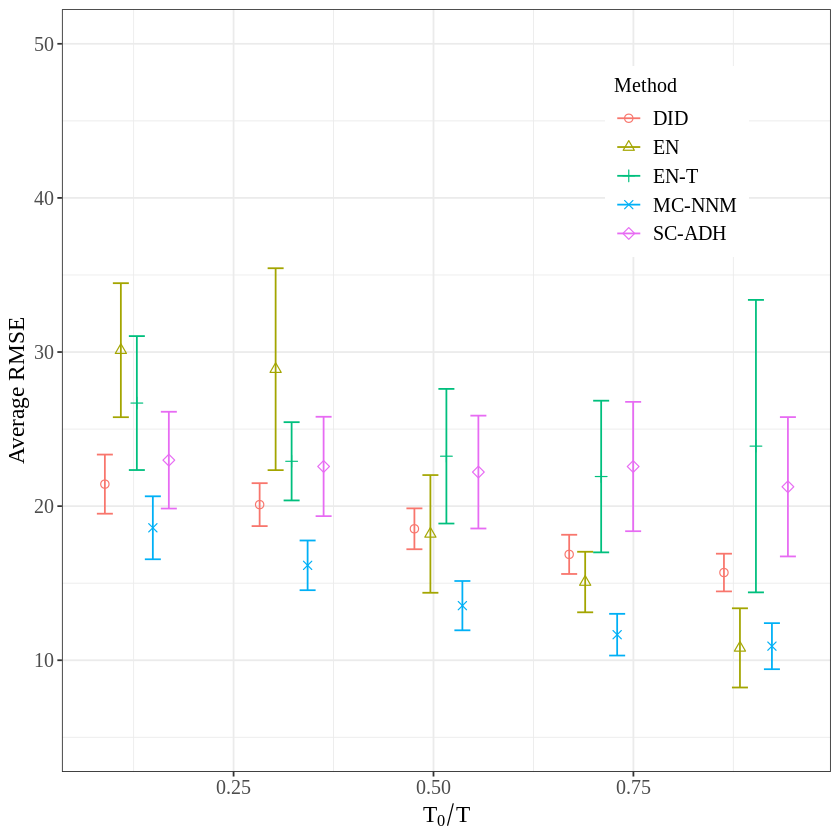

In [9]:
p = ggplot(data = df1, aes(x, y, color = Method, shape = Marker)) +
  geom_point(size = 2, position=position_dodge(width=0.1)) +
  geom_errorbar(
    aes(ymin = lb, ymax = ub),
    width = 0.1,
    linetype = "solid",
    position=position_dodge(width=0.1)) +
  scale_shape_identity() +
  guides(color = guide_legend(override.aes = list(shape = Marker))) +
  theme_bw() +
  xlab(TeX('$T_0/T$')) +
  ylab("Average RMSE") +
  coord_cartesian(ylim=c(5, 50)) +
  theme(
    axis.title=element_text(family="Times", size=14)
    , axis.text=element_text(family="Times", size=12) 
    , legend.text=element_text(family="Times", size = 12)
    , legend.title=element_text(family="Times", size = 12)
    , legend.position = c(.8, .8)
  )
p

## Example: Stock

### Data

In the next illustration we use a financial data set – daily returns for 2453 stocks over 10 years (3082 days)

In [10]:
# Reading data
rm(list=ls())

Y <- t(read.csv("https://raw.githubusercontent.com/susanathey/MCPanel/master/tests/examples_from_paper/stock/returns_no_missing.csv", header = F))

In [11]:
## Setting up the configuration
Nbig <- nrow(Y)
Tbig <- ncol(Y)
N <- 70
T <- 70
number_T0 = 2
T0 <- ceiling(T*((1:number_T0)*2-1)/(2*number_T0))
N_t <- ceiling(N/2)
num_runs <- 5
is_simul <- 0 ## Whether to simulate Simultaneus Adoption or Staggered Adoption
to_save <- 0

In [12]:
## Matrices for saving RMSE values

MCPanel_RMSE_test <- matrix(0L,num_runs,length(T0))
EN_RMSE_test <- matrix(0L,num_runs,length(T0))
ENT_RMSE_test <- matrix(0L,num_runs,length(T0))
DID_RMSE_test <- matrix(0L,num_runs,length(T0))
ADH_RMSE_test <- matrix(0L,num_runs,length(T0))

### Methods

In [13]:
## Run different methods

for(i in c(1:num_runs)){
  print(paste0(paste0("Run number ", i)," started"))
  ## Fix the treated units in the whole run for a better comparison
  all_indices <- sample(1:Nbig, N)
  treat_indices <- sample(1:N, N_t)
  Y_sub <- Y[all_indices,1:T]
  for (j in c(1:length(T0))){
    treat_mat <- matrix(1L, N, T);
    t0 <- T0[j]
    ## Simultaneuous (simul_adapt) or Staggered adoption (stag_adapt)
    if(is_simul == 1){
      treat_mat <- simul_adapt(Y_sub, N_t, t0, treat_indices)
    }
    else{
      treat_mat <- stag_adapt(Y_sub, N_t, t0, treat_indices)
    }
    Y_obs <- Y_sub * treat_mat

    ## ------
    ## MC-NNM
    ## ------
    print("MCNNM Started")
    est_model_MCPanel <- mcnnm_cv(Y_obs, treat_mat, to_estimate_u = 1, to_estimate_v = 1) ## If N<<T it is better to only estimate u, if T<<<N it is better to only estimate v.
    est_model_MCPanel$Mhat <- est_model_MCPanel$L + replicate(T,est_model_MCPanel$u) + t(replicate(N,est_model_MCPanel$v))
    est_model_MCPanel$msk_err <- (est_model_MCPanel$Mhat - Y_sub)*(1-treat_mat)
    est_model_MCPanel$test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_MCPanel$msk_err^2))
    MCPanel_RMSE_test[i,j] <- est_model_MCPanel$test_RMSE

    ## -----
    ## EN : It does Not cross validate on alpha (only on lambda) and keep alpha = 1 (LASSO).
    ##      Change num_alpha to a larger number, if you are willing to wait a little longer.
    ## -----
    print("EN Started")
    est_model_EN <- en_mp_rows(Y_obs, treat_mat, num_alpha = 1)
    est_model_EN_msk_err <- (est_model_EN - Y_sub)*(1-treat_mat)
    est_model_EN_test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_EN_msk_err^2))
    EN_RMSE_test[i,j] <- est_model_EN_test_RMSE

    ## -----
    ## EN_T : It does Not cross validate on alpha (only on lambda) and keep alpha = 1 (LASSO).
    ##        Change num_alpha to a larger number, if you are willing to wait a little longer.
    ## -----
    print("EN-T Started")
    est_model_ENT <- t(en_mp_rows(t(Y_obs), t(treat_mat), num_alpha = 1))
    est_model_ENT_msk_err <- (est_model_ENT - Y_sub)*(1-treat_mat)
    est_model_ENT_test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_ENT_msk_err^2))
    ENT_RMSE_test[i,j] <- est_model_ENT_test_RMSE

    ## -----
    ## DID
    ## -----
    print("DID Started")
    est_model_DID <- DID(Y_obs, treat_mat)
    est_model_DID_msk_err <- (est_model_DID - Y_sub)*(1-treat_mat)
    est_model_DID_test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_DID_msk_err^2))
    DID_RMSE_test[i,j] <- est_model_DID_test_RMSE

    ## -----
    ## ADH
    ## -----
    print("ADH Started")
    est_model_ADH <- adh_mp_rows(Y_obs, treat_mat)
    est_model_ADH_msk_err <- (est_model_ADH - Y_sub)*(1-treat_mat)
    est_model_ADH_test_RMSE <- sqrt((1/sum(1-treat_mat)) * sum(est_model_ADH_msk_err^2))
    ADH_RMSE_test[i,j] <- est_model_ADH_test_RMSE
  }
}


[1] "Run number 1 started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "Run number 2 started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "Run number 3 started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "Run number 4 started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "Run number 5 started"
[1] "MCNNM Started"
[1] "EN Started"
[1] "EN-T Started"
[1] "DID Started"
[1] "ADH Started"
[1] "MCNNM Started"
[1] "EN Started"


In [14]:
## Computing means and standard errors
MCPanel_avg_RMSE <- apply(MCPanel_RMSE_test,2,mean)
MCPanel_std_error <- apply(MCPanel_RMSE_test,2,sd)/sqrt(num_runs)

EN_avg_RMSE <- apply(EN_RMSE_test,2,mean)
EN_std_error <- apply(EN_RMSE_test,2,sd)/sqrt(num_runs)

ENT_avg_RMSE <- apply(ENT_RMSE_test,2,mean)
ENT_std_error <- apply(ENT_RMSE_test,2,sd)/sqrt(num_runs)

DID_avg_RMSE <- apply(DID_RMSE_test,2,mean)
DID_std_error <- apply(DID_RMSE_test,2,sd)/sqrt(num_runs)

ADH_avg_RMSE <- apply(ADH_RMSE_test,2,mean)
ADH_std_error <- apply(ADH_RMSE_test,2,sd)/sqrt(num_runs)

### Plot

In [15]:
df1 <-
  structure(
    list(
      y =  c(DID_avg_RMSE, EN_avg_RMSE, ENT_avg_RMSE, MCPanel_avg_RMSE, ADH_avg_RMSE),
      lb = c(DID_avg_RMSE - 1.96*DID_std_error, EN_avg_RMSE - 1.96*EN_std_error,
             ENT_avg_RMSE - 1.96*ENT_std_error, MCPanel_avg_RMSE - 1.96*MCPanel_std_error,
             ADH_avg_RMSE - 1.96*ADH_std_error),
      ub = c(DID_avg_RMSE + 1.96*DID_std_error, EN_avg_RMSE + 1.96*EN_std_error,
             ENT_avg_RMSE + 1.96*ENT_std_error, MCPanel_avg_RMSE + 1.96*MCPanel_std_error,
             ADH_avg_RMSE + 1.96*ADH_std_error),
      x = c(T0/T, T0/T ,T0/T, T0/T, T0/T),
      Method = c(replicate(length(T0),"DID"), replicate(length(T0),"EN"),
                 replicate(length(T0),"EN-T"), replicate(length(T0),"MC-NNM"),
                 replicate(length(T0),"SC-ADH")),
      Marker = c(replicate(length(T0),1), replicate(length(T0),2),
                 replicate(length(T0),3), replicate(length(T0),4),
                 replicate(length(T0),5))

    ),
    .Names = c("y", "lb", "ub", "x", "Method", "Marker"),
    row.names = c(NA,-10L),
    class = "data.frame"
  )

Marker = c(1,2,3,4,5)


In each case, the average RMSE, for different ratios $T_0/T$, is reported. For clarity of the figures, for each $T_0/T$, while all 95% sampling intervals of various methods are calculated using the same ratio $T_0/T$.

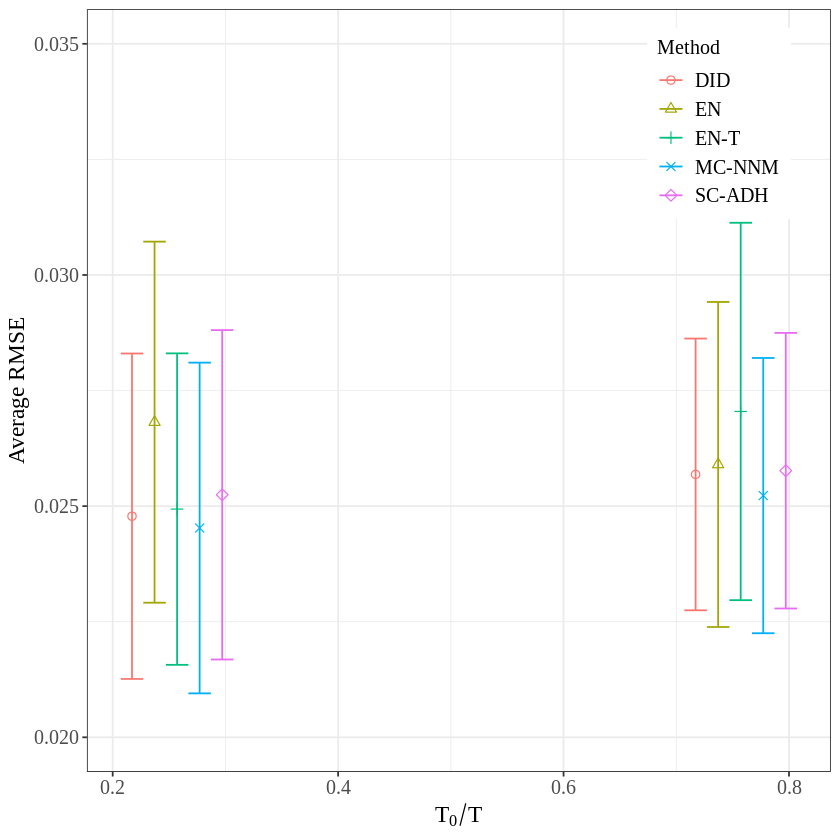

In [16]:

p = ggplot(data = df1, aes(x, y, color = Method, shape=Marker)) +
  geom_point(size = 2, position=position_dodge(width=0.1)) +
  geom_errorbar(
    aes(ymin = lb, ymax = ub),
    width = 0.1,
    linetype = "solid",
    position=position_dodge(width=0.1)) +
  scale_shape_identity() +
  guides(color = guide_legend(override.aes = list(shape = Marker))) +
  theme_bw() +
  xlab(TeX('$T_0/T$')) +
  ylab("Average RMSE") +
  coord_cartesian(ylim=c(0.02, 0.035)) +
  theme(
      axis.title=element_text(family="Times", size=14)
      , axis.text=element_text(family="Times", size=12)
      , legend.text=element_text(family="Times", size = 12)
      , legend.title=element_text(family="Times", size = 12)
      , legend.position = c(.85, .85)
      
  )
p